# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

<h1>New Product Sales Method Analysis - Summary Report</h1>

<h2>Data Validation</h2>


In [83]:
#dependency import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

<p>Visualize first 5 rows of data to understand structure of dataframe</p>

In [84]:
#data import
df = pd.read_csv('product_sales.csv')
df.head(5)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


<p>Print a summary of non-missing values for the dataframe. Revenue appears to be missing 1,074 values.</p>

In [85]:
#dataframe analysis
#looking at data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


<p>Check for easily identifiably pattern in missing revenue values. No pattern appears immediately evident. Revenue will be imputed later.</p>

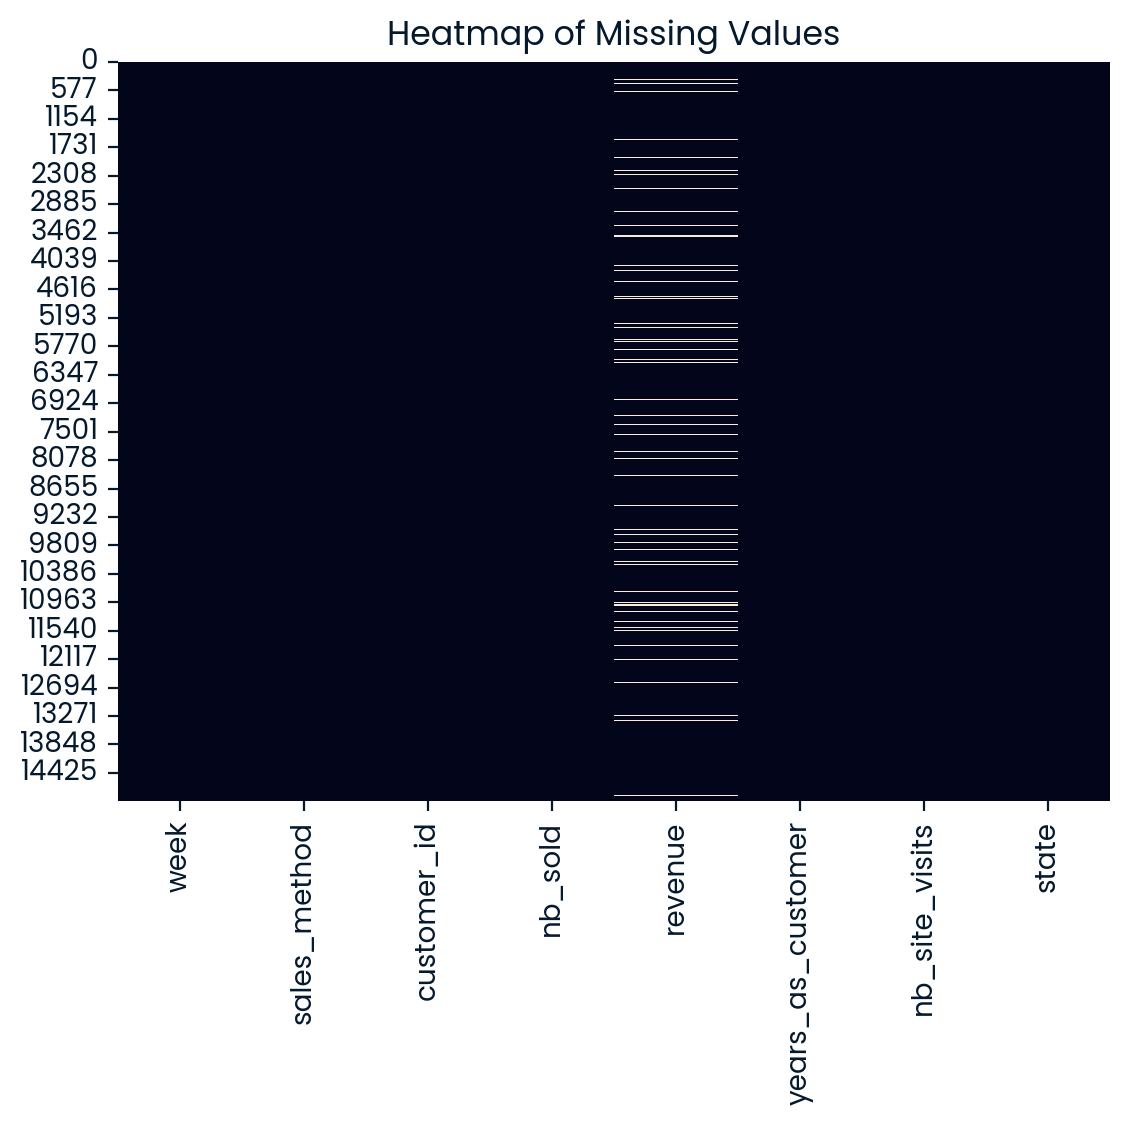

In [86]:
#visualization of missing values
#assessing whether there is a pattern to missing data to address
sns.heatmap(df.isna(), cbar=False)
plt.title('Heatmap of Missing Values')
plt.show()

<p>Table of summary statistics for reference when cleaning each column</p>

In [87]:
#cursory check of fields
#looking for abnormal patterns in any data column
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


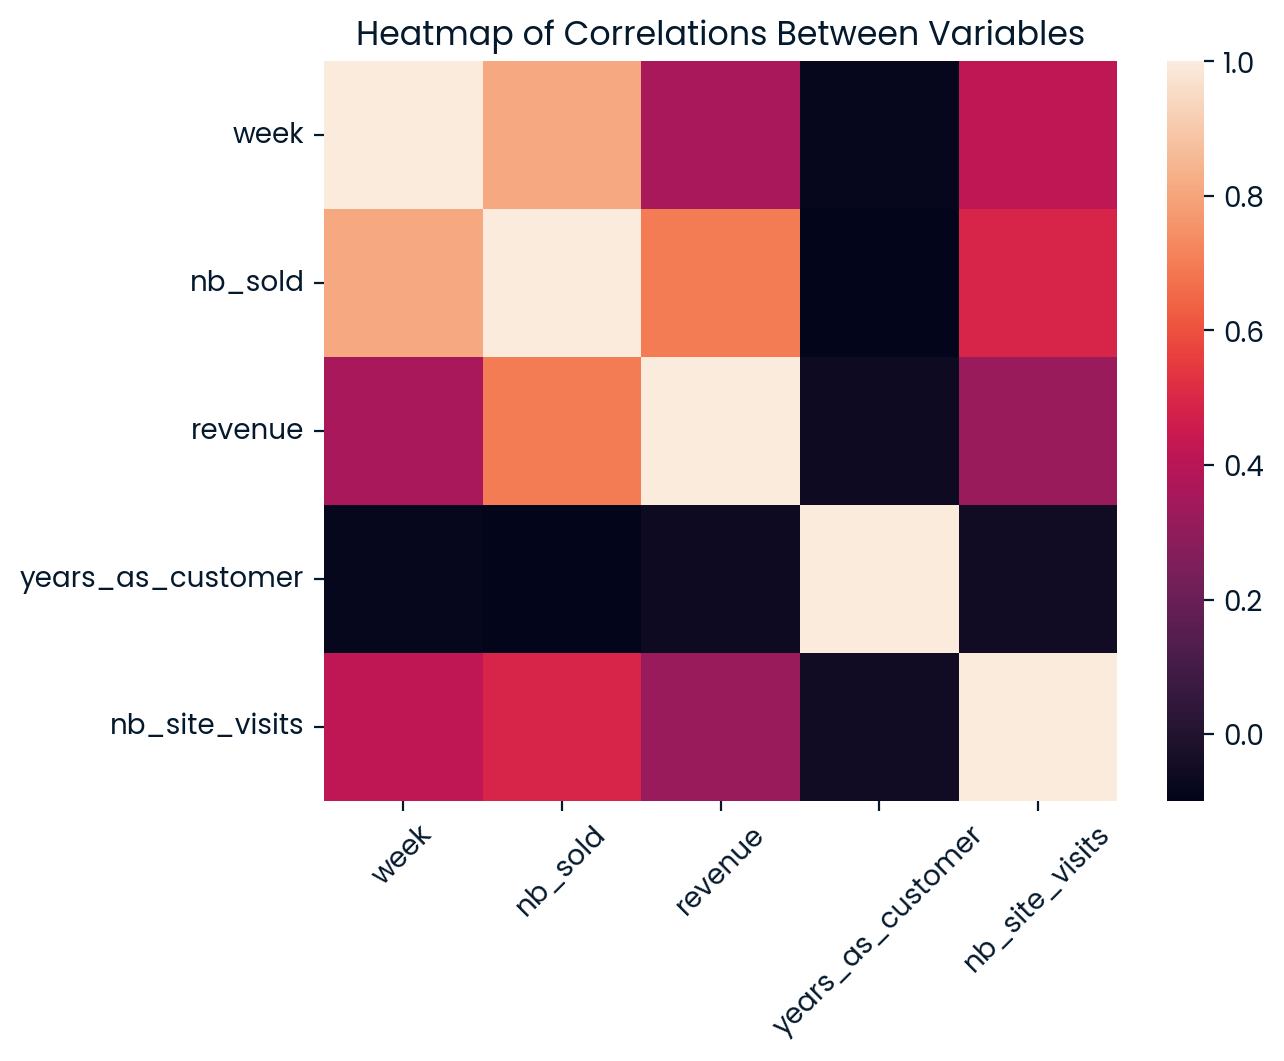

In [88]:
#check for any insightful correlations
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.title('Heatmap of Correlations Between Variables')
plt.xticks(rotation=45)
plt.show()

<h3>Week</h3>
<p>Check week for unique values. Values should all be integers between 1 and 6. Output confirms all values are in correct range</p>

In [89]:
#check for all unique weeks values.
df['week'].unique()

array([2, 6, 5, 4, 3, 1])

In [90]:
print('Value Counts for Weeks')
df['week'].value_counts()

Value Counts for Weeks


1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: week, dtype: int64

<h3>Sales Method</h3>
<p>Check unique values in sales_method. There are discrepancies with capitalization and spelling. sales_method will be recoded with title case and 'em' abbreviation recoded as email</p>

In [91]:
#check for incorrect sales method spellings and capitalizations
#sales_method assessed
text_check = df['sales_method'].unique()
text_check.sort()
print('Sales method unique values:',text_check)

Sales method unique values: ['Call' 'Email' 'Email + Call' 'em + call' 'email']


In [92]:
#standardizes capitalization
df['sales_method'] = df['sales_method'].str.title()

#fixes abbreviated input
sm = list(df['sales_method'])
sm = [x if x != 'Em + Call' else 'Email + Call' for x in sm]
df['sales_method'] = sm

text_check = df['sales_method'].unique()
text_check.sort()
print('Sales method corrected values:',text_check)

Sales method corrected values: ['Call' 'Email' 'Email + Call']


In [93]:
print('Value Counts for sales_method')
df['sales_method'].value_counts()

Value Counts for sales_method


Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

<h3>Customer ID</h3>
<p>Check that all customer IDs are unique. There are 15,000 unique values, and when the column values are counted and sorted by most frequent, no value exceeds 1.</p>

In [94]:
#check that all customer IDs are unique
print('Unique Customer IDs:',df['customer_id'].unique().shape[0])

Unique Customer IDs: 15000


In [95]:
#counts how many times each value appears, sorts by most frequent values, limits to top 5
print('Most Frequent Customer IDs')
df['customer_id'].value_counts(ascending=False).head(5)

Most Frequent Customer IDs


2e72d641-95ac-497b-bbf8-4861764a7097    1
e0c955c5-50b4-43dc-bfdd-e181ac3c8e50    1
8a7a36dd-8fdc-4d08-b87d-4f1548f723be    1
f7c7fcbe-ac44-4e62-a470-b04eb19fb5a1    1
9149e07e-cd2f-4a94-a97b-2f2f475afdbb    1
Name: customer_id, dtype: int64

<h3>NB Sold</h3>
<p>NB sold is an integer as dictated above. There are no missing values as shown above. Max and min values are within expected range (16 and 7). The visualization shows a mostly normal distribution. No values must be imputed or cleaned.</p>

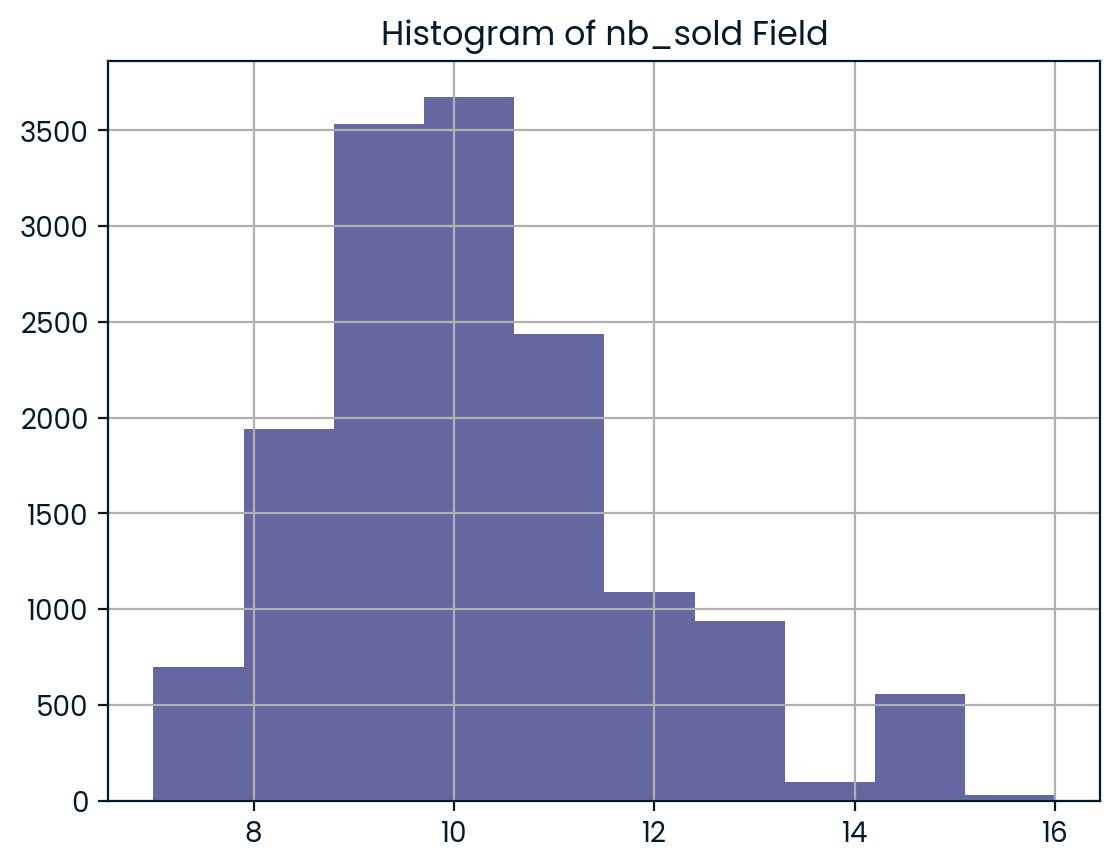

In [96]:
#check for concerning distribution in field
df['nb_sold'].hist()
plt.title('Histogram of nb_sold Field')
plt.show()

<h3>Revenue</h3>
<p>Because the sales department is interested in revenue by sales method, imputation will be done in subsets by sales_method. First, we will assess data for skew to determine which method of imputation is best. The data is moderately skewed in 2/3 methods and contains outliers in 2/3 methods. Median imputation is selected. Final graphic indicates missing values after imputation.</p>

In [97]:
print('Email skew:', stats.skew(df[((df['sales_method'] == 'Email') & (~df['revenue'].isna()))]['revenue']))
print('Call skew:', stats.skew(df[((df['sales_method'] == 'Call') & (~df['revenue'].isna()))]['revenue']))
print('Email + Call skew:', stats.skew(df[((df['sales_method'] == 'Email + Call') & (~df['revenue'].isna()))]['revenue']))

Email skew: 0.8339230479859757
Call skew: 0.4533571457975162
Email + Call skew: 0.07735745047685236


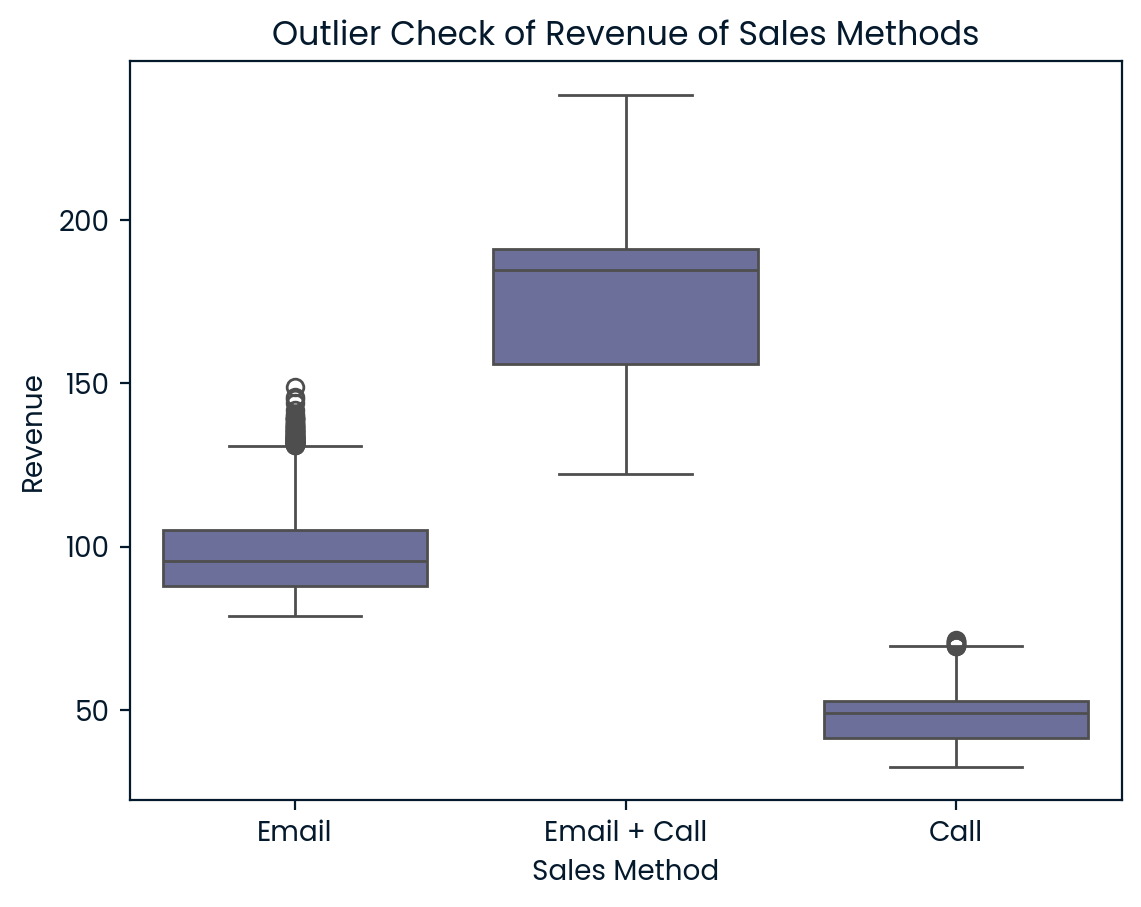

In [98]:
sns.boxplot(x='sales_method', y='revenue', data=df)
plt.title('Outlier Check of Revenue of Sales Methods')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()

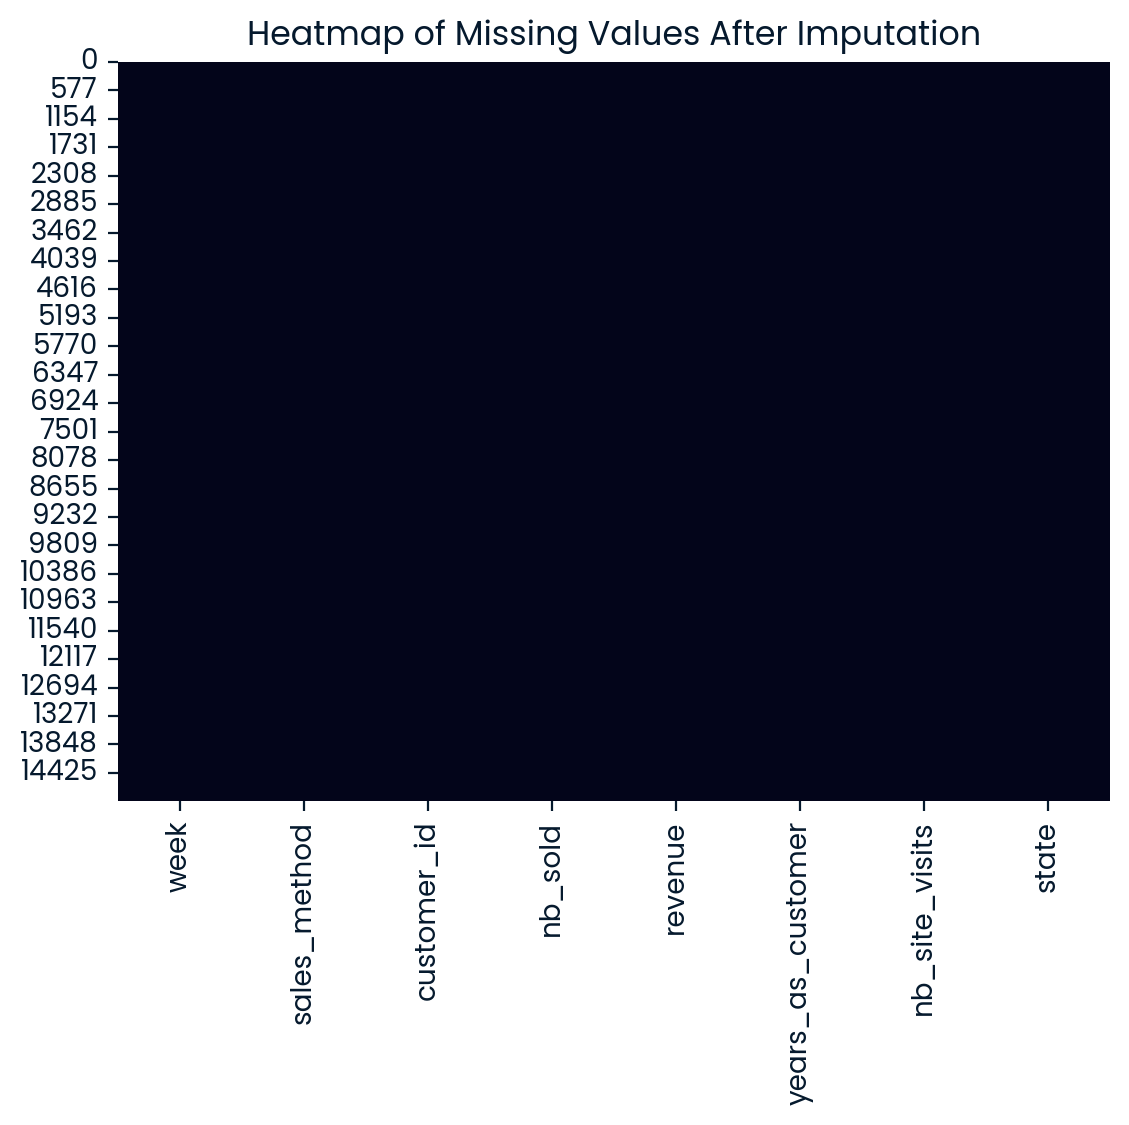

In [99]:
#address missing values in revenue column
#impute missing revenue values by subset with subset median
df_imputed = df.copy()
revenues_dict = df.groupby('sales_method')['revenue'].median().to_dict()
df_imputed['revenue'] = df_imputed['revenue'].fillna(df_imputed['sales_method'].map(revenues_dict))

sns.heatmap(df_imputed.isnull(),cbar=False)
plt.title('Heatmap of Missing Values After Imputation')
plt.show()

<h3>Years as Customer</h3>
<p>All values in this field should be positive integers less than 41. The data type is int, and the minimum is, correctly, 0 as indicated in the decsription table above. The max value is over the acceptable limit. The number of incorrect entries is less than 5% of the data. These rows will be deleted.</p>

In [100]:
print('Number of incorrecte entries:',df_imputed[df_imputed['years_as_customer'] > 42].shape[0])

Number of incorrecte entries: 2


In [101]:
df_imputed = df_imputed[df_imputed['years_as_customer'] <= 42]
print('New max:', df_imputed['years_as_customer'].max())

New max: 39


<h3>NB Site Visits</h3>
<p>This field should contain only positive integers without extreme outliers. The data type is int, the max is 41, and the min is 12 as indicated in the descriptive tables above. All values are within expected range for purchasing customers. The distribution appears normal. No further cleaning steps are necessary.</p>

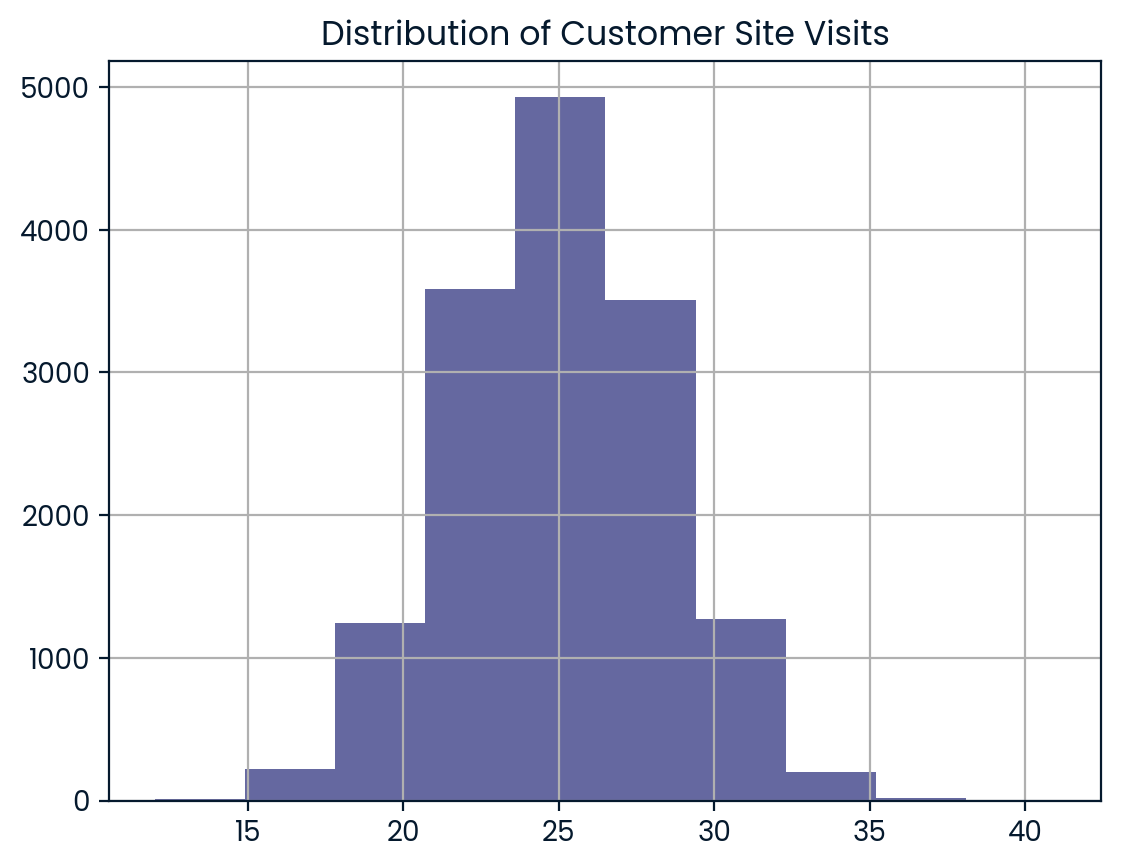

In [102]:
df_imputed['nb_site_visits'].hist()
plt.title('Distribution of Customer Site Visits')
plt.show()

<h3>State</h3>
<p>This field should contain the name of the state for the each account. Unique values checked for consistent spelling and capialization. The data has a geometric dtrstribution, which is expected in this sales context.</p>

In [103]:
#check for state mispellings or capitalization mistakes
text_check = df_imputed['state'].unique()
text_check.sort()
print('States values check:',text_check)

States values check: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [104]:
print('Unique State Values:', df_imputed['state'].unique().shape[0])

Unique State Values: 50


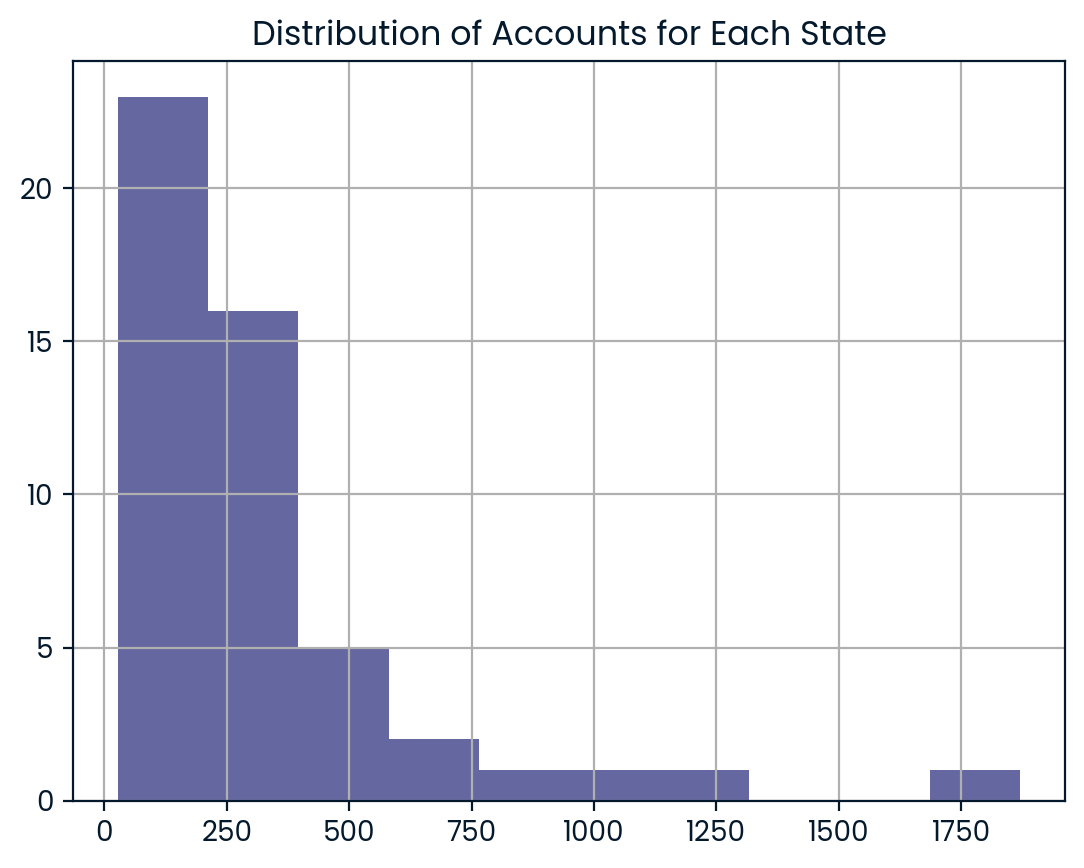

In [105]:
df_imputed['state'].value_counts(ascending=False).hist()
plt.title('Distribution of Accounts for Each State')
plt.show()

In [106]:
#display number of customers in each sales method group
#diplay sales for each group and proportions
print('Email Customers:', df_imputed[df_imputed['sales_method'] == 'Email'].shape[0], '-',round(df_imputed[df_imputed['sales_method'] == 'Email'].shape[0]/15000*100,2),'%')
print('Email Gross Revenue:', round(df_imputed[df_imputed['sales_method'] == 'Email']['revenue'].sum(),2), '-',\
     round(df_imputed[df_imputed['sales_method'] == 'Email']['revenue'].sum()/df_imputed['revenue'].sum()*100,2))
print('---------------------------------------')


print('Call Customers:', df_imputed[df_imputed['sales_method'] =='Call'].shape[0], '-',round(df_imputed[df_imputed['sales_method'] == 'Call'].shape[0]/15000*100,2),'%')
print('Call Gross Revenue:', round(df_imputed[df_imputed['sales_method'] == 'Call']['revenue'].sum(),2), '-',\
     round(df_imputed[df_imputed['sales_method'] == 'Call']['revenue'].sum()/df_imputed['revenue'].sum()*100,2))
print('---------------------------------------')


print('Email + Call:', df_imputed[df_imputed['sales_method'] == 'Email + Call'].shape[0], '-',round(df_imputed[df_imputed['sales_method'] == 'Email + Call'].shape[0]/15000*100,2),'%')
print('Email Gross Revenue:', round(df_imputed[df_imputed['sales_method'] == 'Email + Call']['revenue'].sum(),2), '-',\
     round(df_imputed[df_imputed['sales_method'] == 'Email + Call']['revenue'].sum()/df_imputed['revenue'].sum()*100,2))

Email Customers: 7465 - 49.77 %
Email Gross Revenue: 724216.13 - 50.53
---------------------------------------
Call Customers: 4961 - 33.07 %
Call Gross Revenue: 236394.69 - 16.49
---------------------------------------
Email + Call: 2572 - 17.15 %
Email Gross Revenue: 472730.95 - 32.98


<h3>Customers Per Approach</h3>
<table>
    <tr>
        <th>Approach</th><th># of Customers</th><th>%of Customers</th><th>Sales Revenue</th><th>% of total Revenue</th>
    </tr>
    <tr>
        <th>Email</th><td>7,465</td><td>49.77%</td><td>$724,216.13</td><td>50.53%</td>
    </tr>
    <tr>
        <th>Call</th><td>4,961</td><td>33.07 %</td><td>$236,394.69</td><td>16.49%</td>
    </tr>
    <tr>
        <th>Email + Call</th><td>2,572</td><td>17.15 %</td><td>$472,730.95</td><td>32.98%</td>
    </tr>
</table>	


<h3>Overall Revenue</h3>
  
<p>The distribution of all revenue contains a significant number of customers in the lowest revenue tier and then a right-skewed distribution afterward. There is an abnormally large group of customers just below $200, which disrupts the "normal distribution but with a large group at the lowest price point" distribution often seen in sales. This is cause for further inspection - something may be causing this grouping.</p>

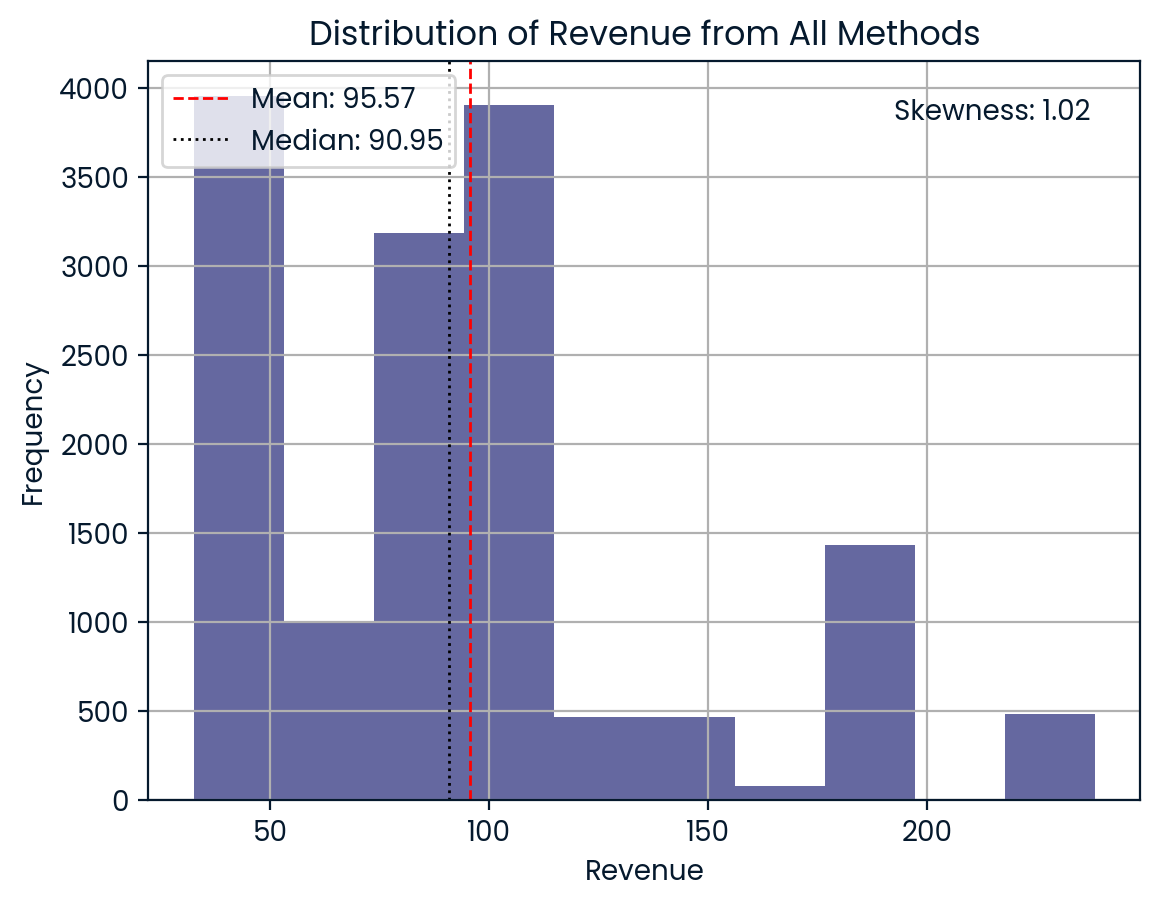

In [107]:
#Histogram of overall revenue
mean_val = df_imputed['revenue'].mean()
median_val = df_imputed['revenue'].median()
skewness_val = stats.skew(df_imputed['revenue'])
df_imputed['revenue'].hist()
plt.title('Distribution of Revenue from All Methods')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='black', linestyle='dotted', linewidth=1, label=f'Median: {median_val:.2f}')
plt.text(0.95, 0.95, f'Skewness: {skewness_val:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right')
plt.legend(loc = 'upper left')
plt.show()

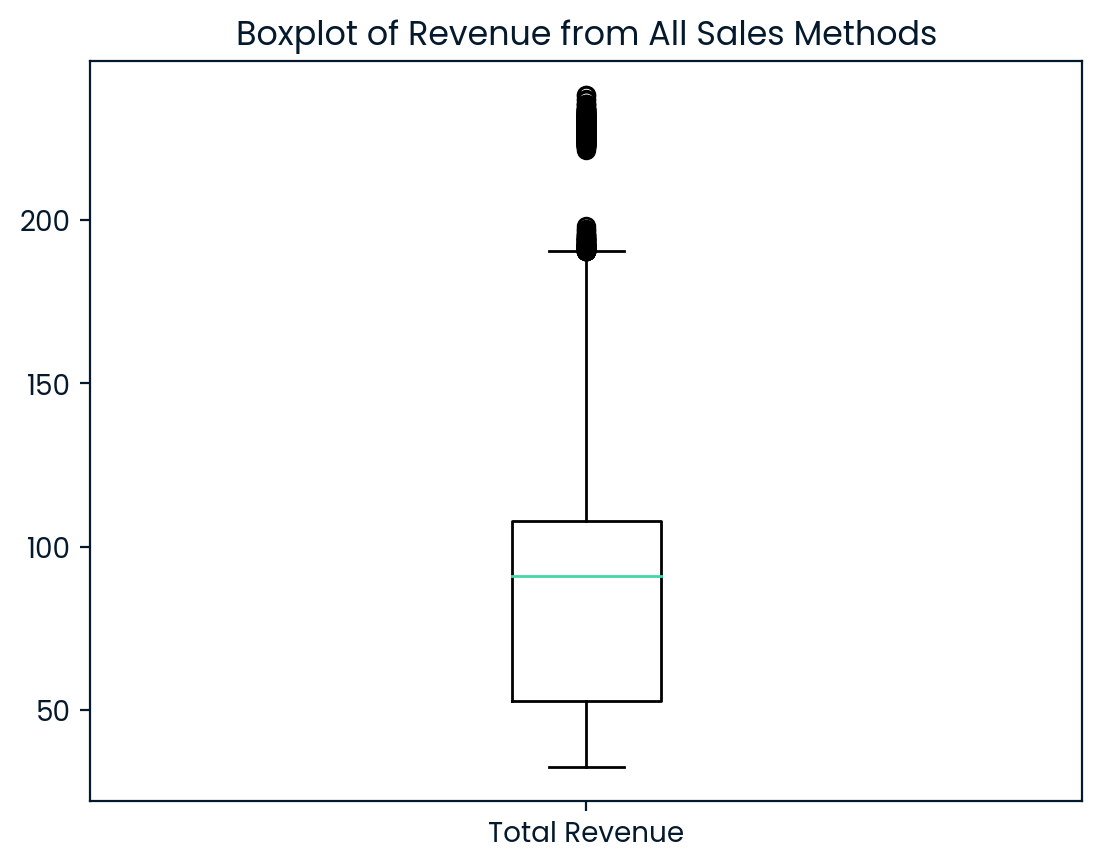

In [108]:
#boxplot of overall revenue
plt.boxplot(df_imputed['revenue'], labels=['Total Revenue'])
plt.title('Boxplot of Revenue from All Sales Methods')
plt.show()

<h3>Email Revenue</h3>
 
<p>Email revenue is tightly concentrated and mostly normally distributed. There is a slight right skew. </p>


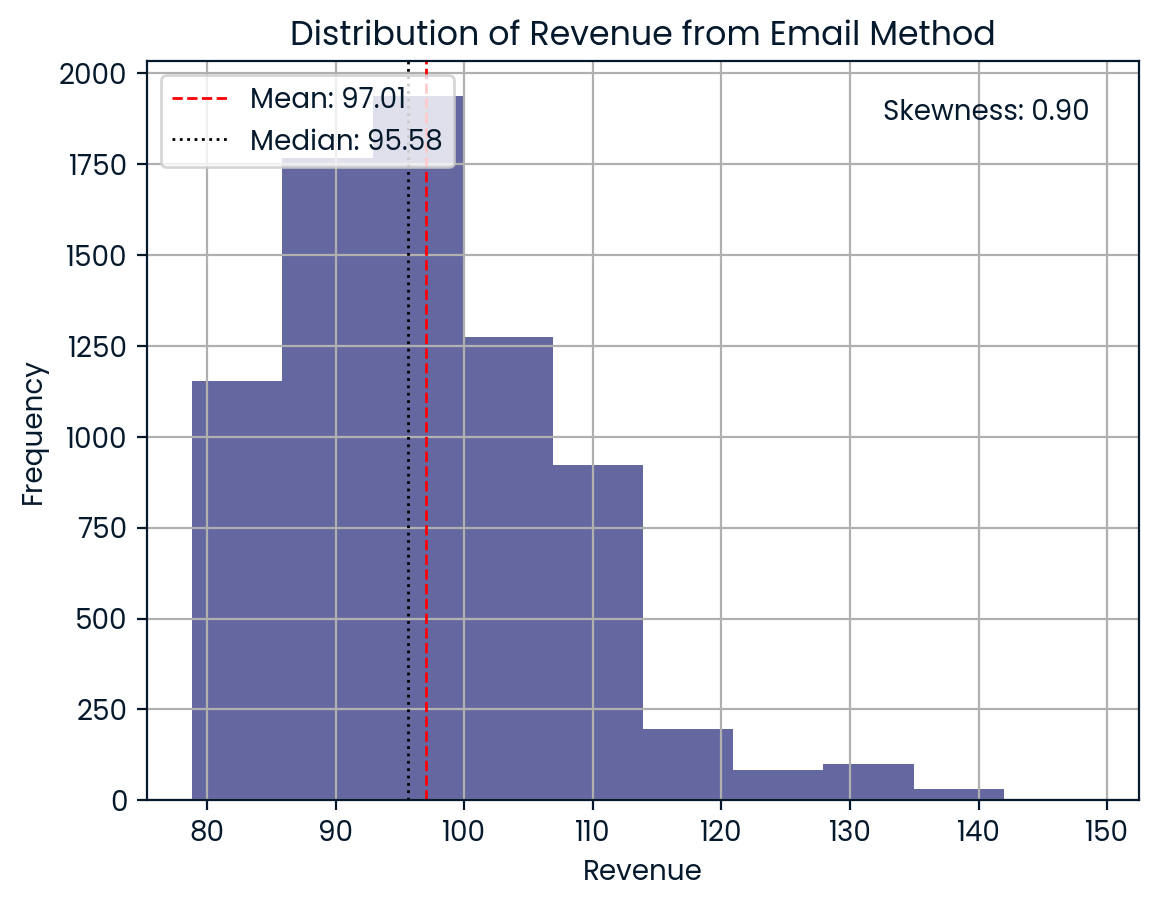

In [109]:
#histogram of Email revenue
mean_val = df_imputed[df_imputed['sales_method'] == 'Email']['revenue'].mean()
median_val = df_imputed[df_imputed['sales_method'] == 'Email']['revenue'].median()
skewness_val = stats.skew(df_imputed[df_imputed['sales_method'] == 'Email']['revenue'])
df_imputed[df_imputed['sales_method'] == 'Email']['revenue'].hist()
plt.title('Distribution of Revenue from Email Method')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='black', linestyle='dotted', linewidth=1, label=f'Median: {median_val:.2f}')
plt.text(0.95, 0.95, f'Skewness: {skewness_val:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right')
plt.legend(loc = 'upper left')
plt.show()

<h3>Call Revenue</h3>
 
<p>Call revenue is irregularly distributed. The vast majority of Call revenue is on the lower end, but there are many high end outliers in a group together.</p>

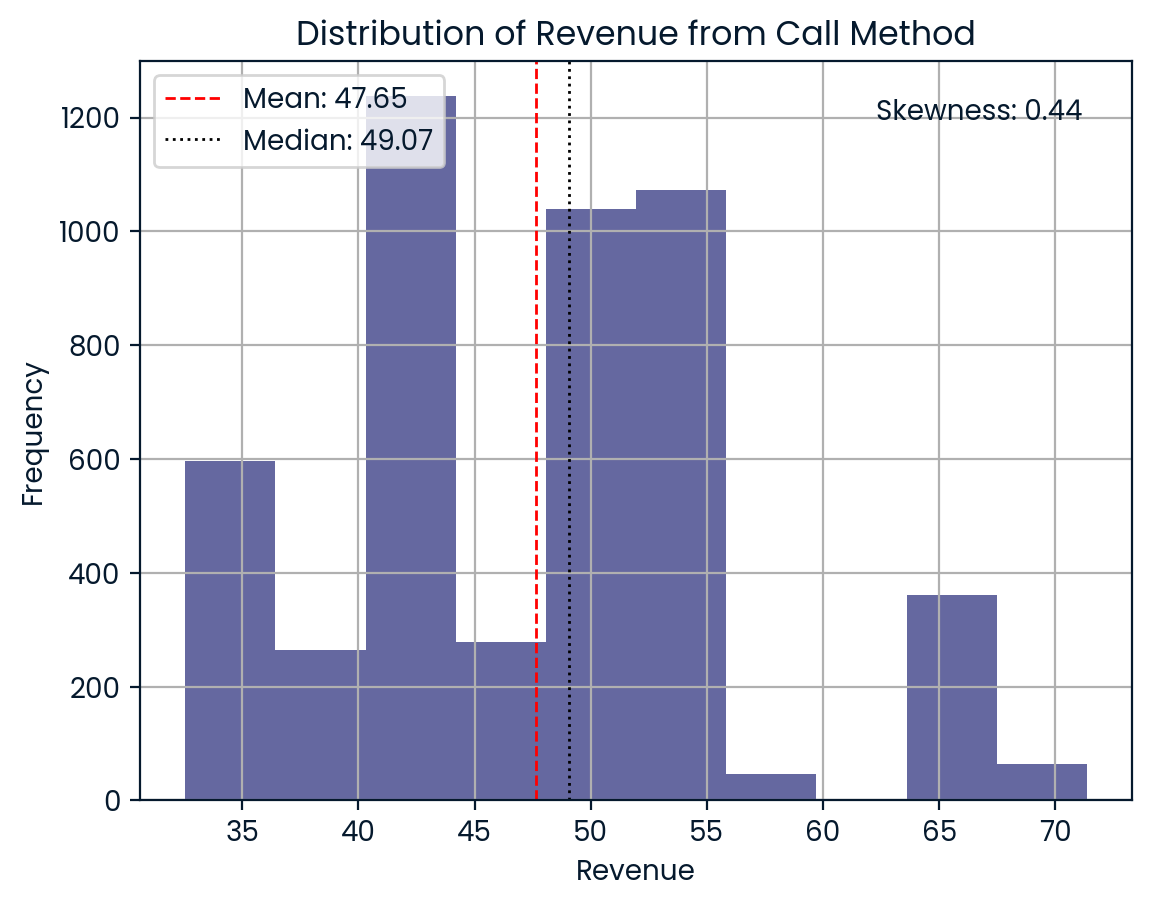

In [110]:
#histogram of Call revenue
mean_val = df_imputed[df_imputed['sales_method'] == 'Call']['revenue'].mean()
median_val = df_imputed[df_imputed['sales_method'] == 'Call']['revenue'].median()
skewness_val = stats.skew(df_imputed[df_imputed['sales_method'] == 'Call']['revenue'])
df_imputed[df_imputed['sales_method'] == 'Call']['revenue'].hist()
plt.title('Distribution of Revenue from Call Method')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='black', linestyle='dotted', linewidth=1, label=f'Median: {median_val:.2f}')
plt.text(0.95, 0.95, f'Skewness: {skewness_val:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right')
plt.legend(loc = 'upper left')
plt.show()

<h3>Email + Call Revenue</h3>
 
<p>Email + call revenue is slightly left-skewed with a significant number of high-revenue customers. It is clear this group is causing the abnormal grouping seen in the overall revenue graph. Email + Call seems to have abnormally strong revenue performance relative to the other sales methods.</p>

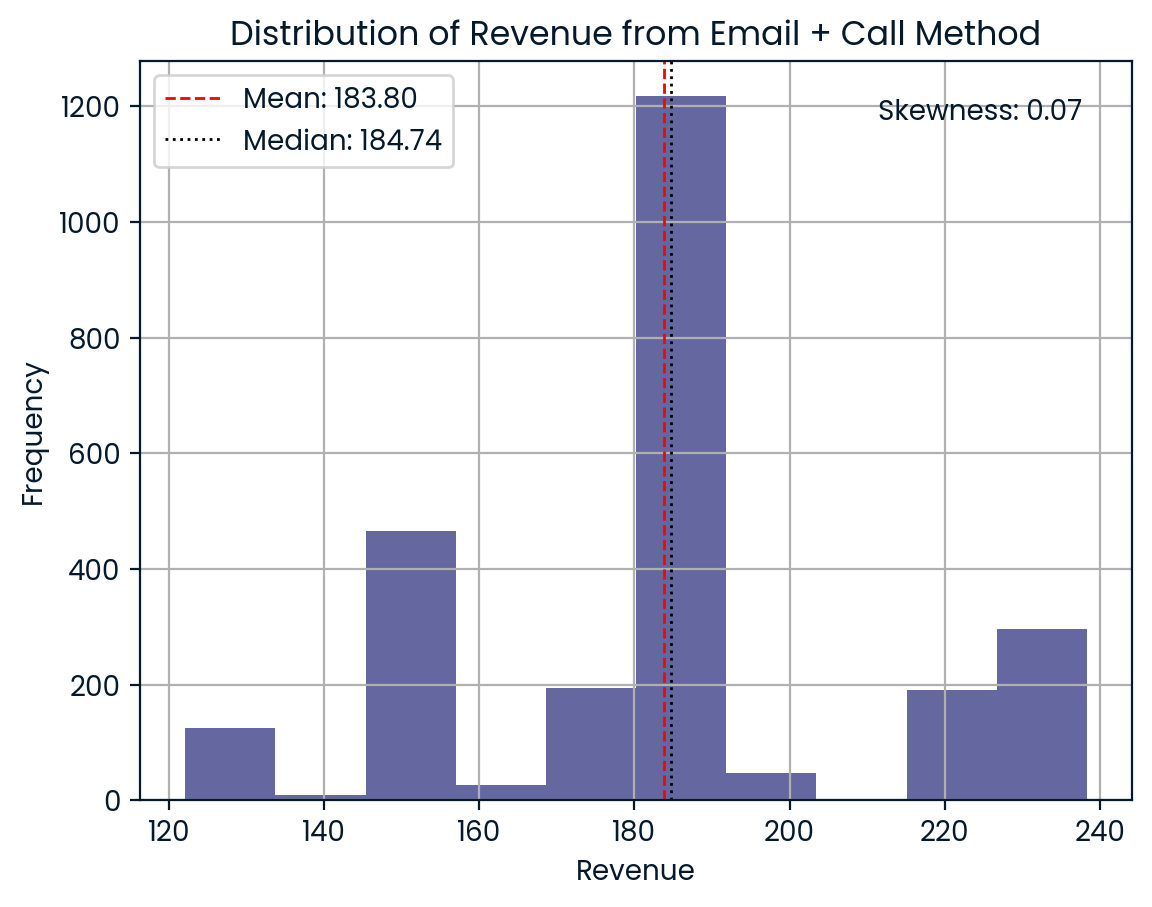

In [111]:
#histogram of Email + Calll Revenue
mean_val = df_imputed[df_imputed['sales_method'] == 'Email + Call']['revenue'].mean()
median_val = df_imputed[df_imputed['sales_method'] == 'Email + Call']['revenue'].median()
skewness_val = stats.skew(df_imputed[df_imputed['sales_method'] == 'Email + Call']['revenue'])
df_imputed[df_imputed['sales_method'] == 'Email + Call']['revenue'].hist()
plt.title('Distribution of Revenue from Email + Call Method')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='black', linestyle='dotted', linewidth=1, label=f'Median: {median_val:.2f}')
plt.text(0.95, 0.95, f'Skewness: {skewness_val:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right')
plt.legend(loc = 'upper left')
plt.show()

<h3>Revenues Compared by Method</h3>
  
<p>Graphically, it appears that there are significant differences between sales methods when comparing revenues, with a clear first, second, and third method. One way ANOVA testing confirms that there is a statistically significant difference between group means. Further, there are clear differences in the effectiveness over time of each method.
    <ul>
        <li>Call is the least effective revenue generator, with little difference week to week</li>
	    <li>Email is most effective in the first 3 weeks, but declines in effectiveness over time</li>
	    <li>Email + Call ramps up effectiveness over the course of the sales cycle, becoming the most effective in weeks 5 and 6.</li>
    </ul>
The Call sales method is the weakest and should be discontinued in favor of a targeted strategy of Email and Email + Call methods.</p>

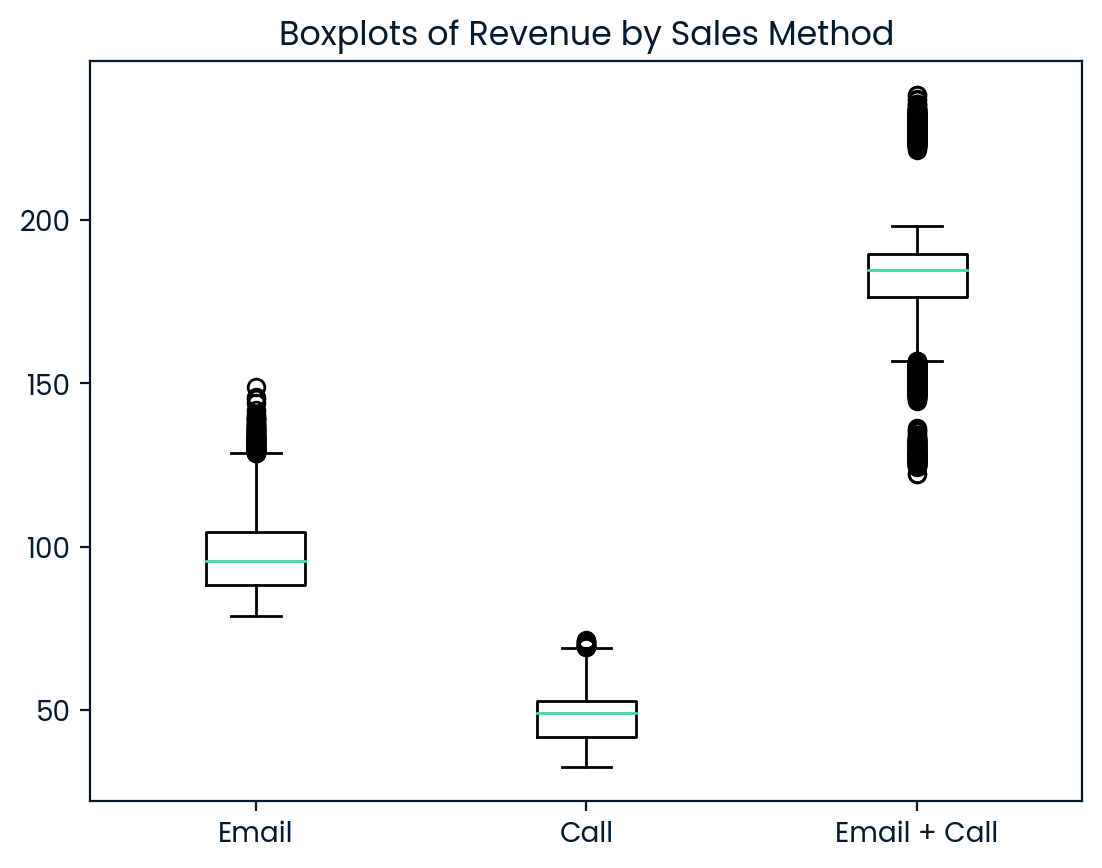

In [112]:
#comparative boxplots of revenue per method
emails = df_imputed[df_imputed['sales_method'] == 'Email']['revenue']
calls = df_imputed[df_imputed['sales_method'] == 'Call']['revenue']
emails_calls = df_imputed[df_imputed['sales_method'] == 'Email + Call']['revenue']

plt.boxplot([emails,calls,emails_calls], labels=['Email', 'Call', 'Email + Call'])
plt.title('Boxplots of Revenue by Sales Method')
plt.show()

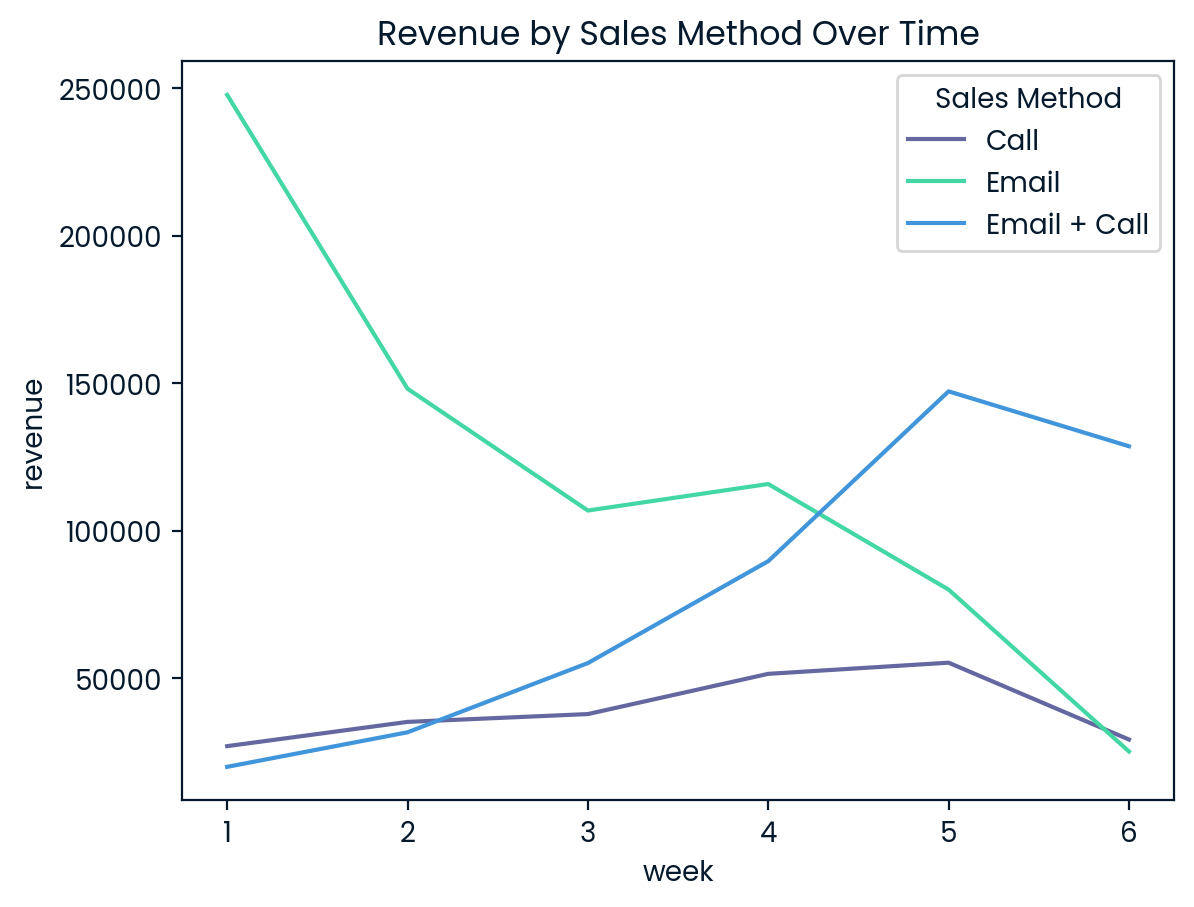

In [113]:
#line graph of revenue over time for each sales method
methods_over_time = df_imputed.groupby(['sales_method', 'week'])['revenue'].sum().reset_index()
sns.lineplot(x='week', y='revenue', hue='sales_method', data=methods_over_time)
plt.legend(title='Sales Method')
plt.title('Revenue by Sales Method Over Time')
plt.show()

In [114]:
#ANOVA for sales methods
f_statistic, p_value = stats.f_oneway(emails, calls, emails_calls)
if p_value < 0.05:
    print(f'p = {p_value}. There is a statistically significant differenct in revenue between sales methods.')
else:
    print(f'p = {p_value}. There is not a statistically significant differenct in revenue between sales methods.')

p = 0.0. There is a statistically significant differenct in revenue between sales methods.


In [115]:
#prepare data for modelling
X = pd.get_dummies(df_imputed.drop(columns=['sales_method', 'customer_id']))
y = df_imputed['sales_method']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

<h3>Customer Identification</h3>
 
<p>A decision tree was generated using sci-kit learn’s GridSearchCV and DecisionTreeClassifier tools and achieved 0.97 or above in accuracy, precision, recall, and sensitivity. The overall indication is that successful sales to each group can be mostly identified by the revenue from the sale. The Email sales method was effective for customers making lower value purchases. Call and Email + Call methods were effective for higher revenue sales.</p>
 
<p>A second tree was generated with the same methodology after the revenue field was removed from the data. This was done to achieve additional insight into customer groups. This tree is primarily separated by the number of products sold, with Email trending toward the lower end, while methods that used calls trending toward the higher end.</p>

<p>These trees demonstrate that customers with cheaper orders or fewer products are effectively reached via email alone, while customers with more expensive orders of more products prefer to speak to a sales representative before purchasing.</p>

In [116]:
#grid search to create best decision tree for customer data
param_grid = {
    'max_depth' : range(1,6),
    'min_samples_split' : range(2,11)    
}

tree = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(tree, param_grid=param_grid, cv=5)
grid.fit(X_train,y_train)

grid.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=42)

In [117]:
#performance metrics of decision tree model
model = grid.best_estimator_
y_pred = model.predict(X_test)

print('Decision Tree 1')
print("Classification Report:")
print(classification_report(y_test, y_pred))

print('-------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))

Decision Tree 1
Classification Report:
              precision    recall  f1-score   support

        Call       1.00      1.00      1.00      1517
       Email       1.00      1.00      1.00      2207
Email + Call       1.00      1.00      1.00       776

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500

-------------------------------
Confusion Matrix:
[[1517    0    0]
 [   0 2206    1]
 [   0    0  776]]


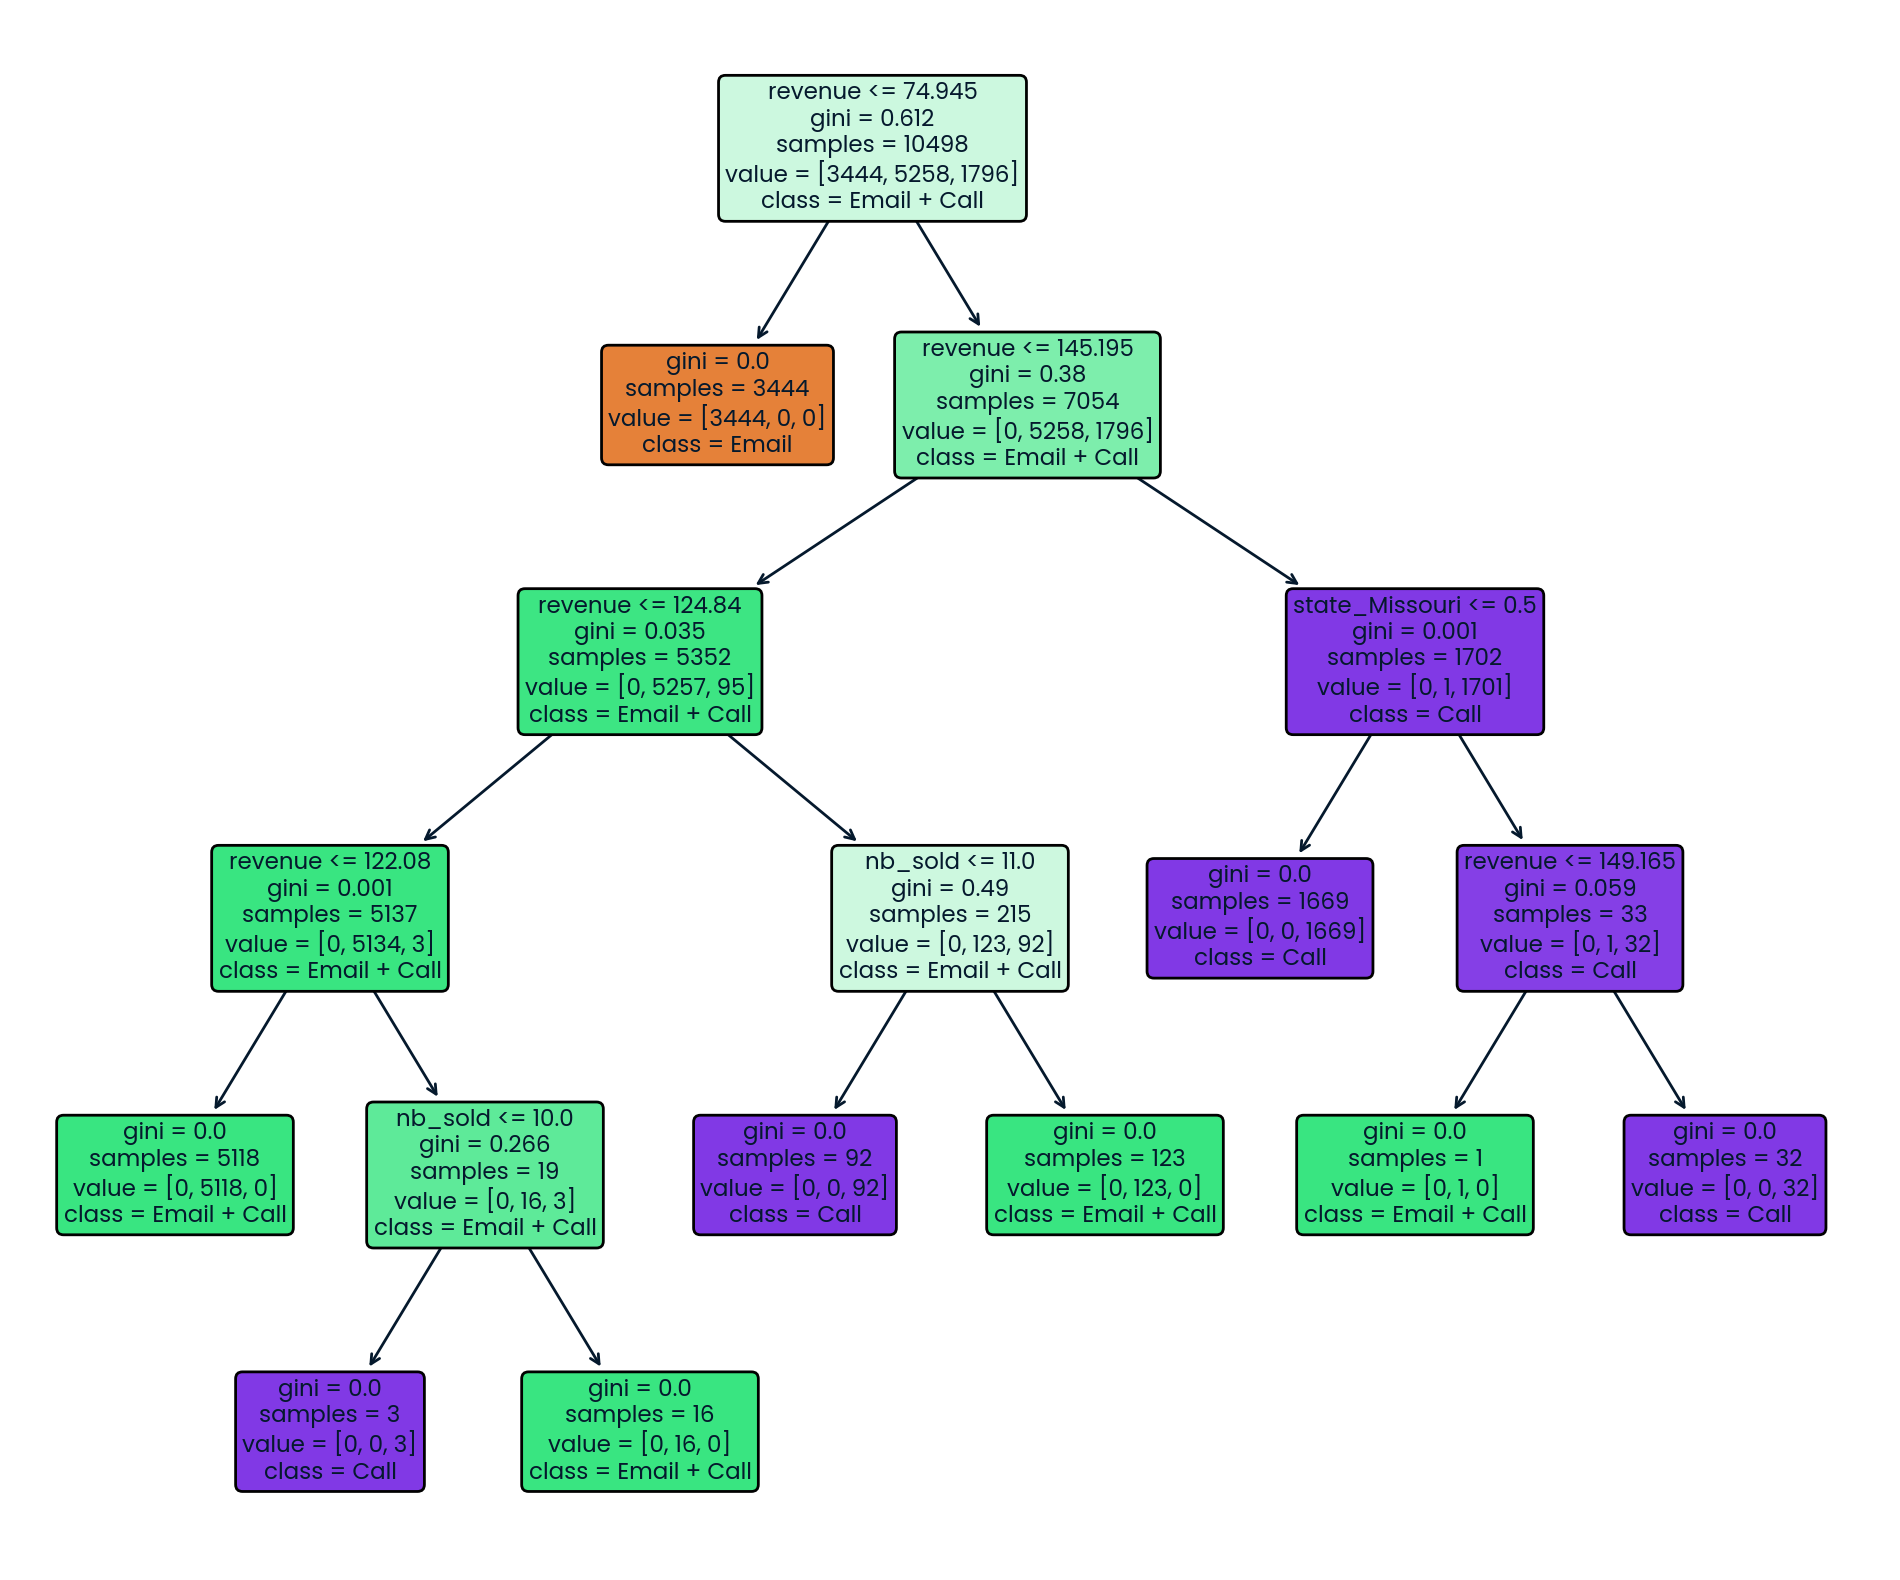

In [118]:
#decision tree visualization
plt.figure(figsize=(12,10))
plot_tree(model, 
          feature_names=list(X.columns.values), 
          class_names=list(y.values),
         filled=True,
         rounded=True)
plt.show()

In [119]:
#prepare data for modelling
X = pd.get_dummies(df_imputed.drop(columns=['sales_method', 'customer_id','revenue']))
y = df_imputed['sales_method']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [120]:
#grid search to create best decision tree for customer data
param_grid = {
    'max_depth' : range(1,6),
    'min_samples_split' : range(2,11)    
}

tree = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(tree, param_grid=param_grid, cv=5)
grid.fit(X_train,y_train)

grid.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_split=7, random_state=42)

In [121]:
#performance metrics of decision tree model
model = grid.best_estimator_
y_pred = model.predict(X_test)

print('Decision Tree 2')
print("Classification Report:")
print(classification_report(y_test, y_pred))

print('-------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))

Decision Tree 2
Classification Report:
              precision    recall  f1-score   support

        Call       0.68      0.78      0.73      1517
       Email       0.74      0.72      0.73      2207
Email + Call       0.91      0.72      0.80       776

    accuracy                           0.74      4500
   macro avg       0.78      0.74      0.75      4500
weighted avg       0.75      0.74      0.74      4500

-------------------------------
Confusion Matrix:
[[1190  327    0]
 [ 572 1583   52]
 [   0  220  556]]


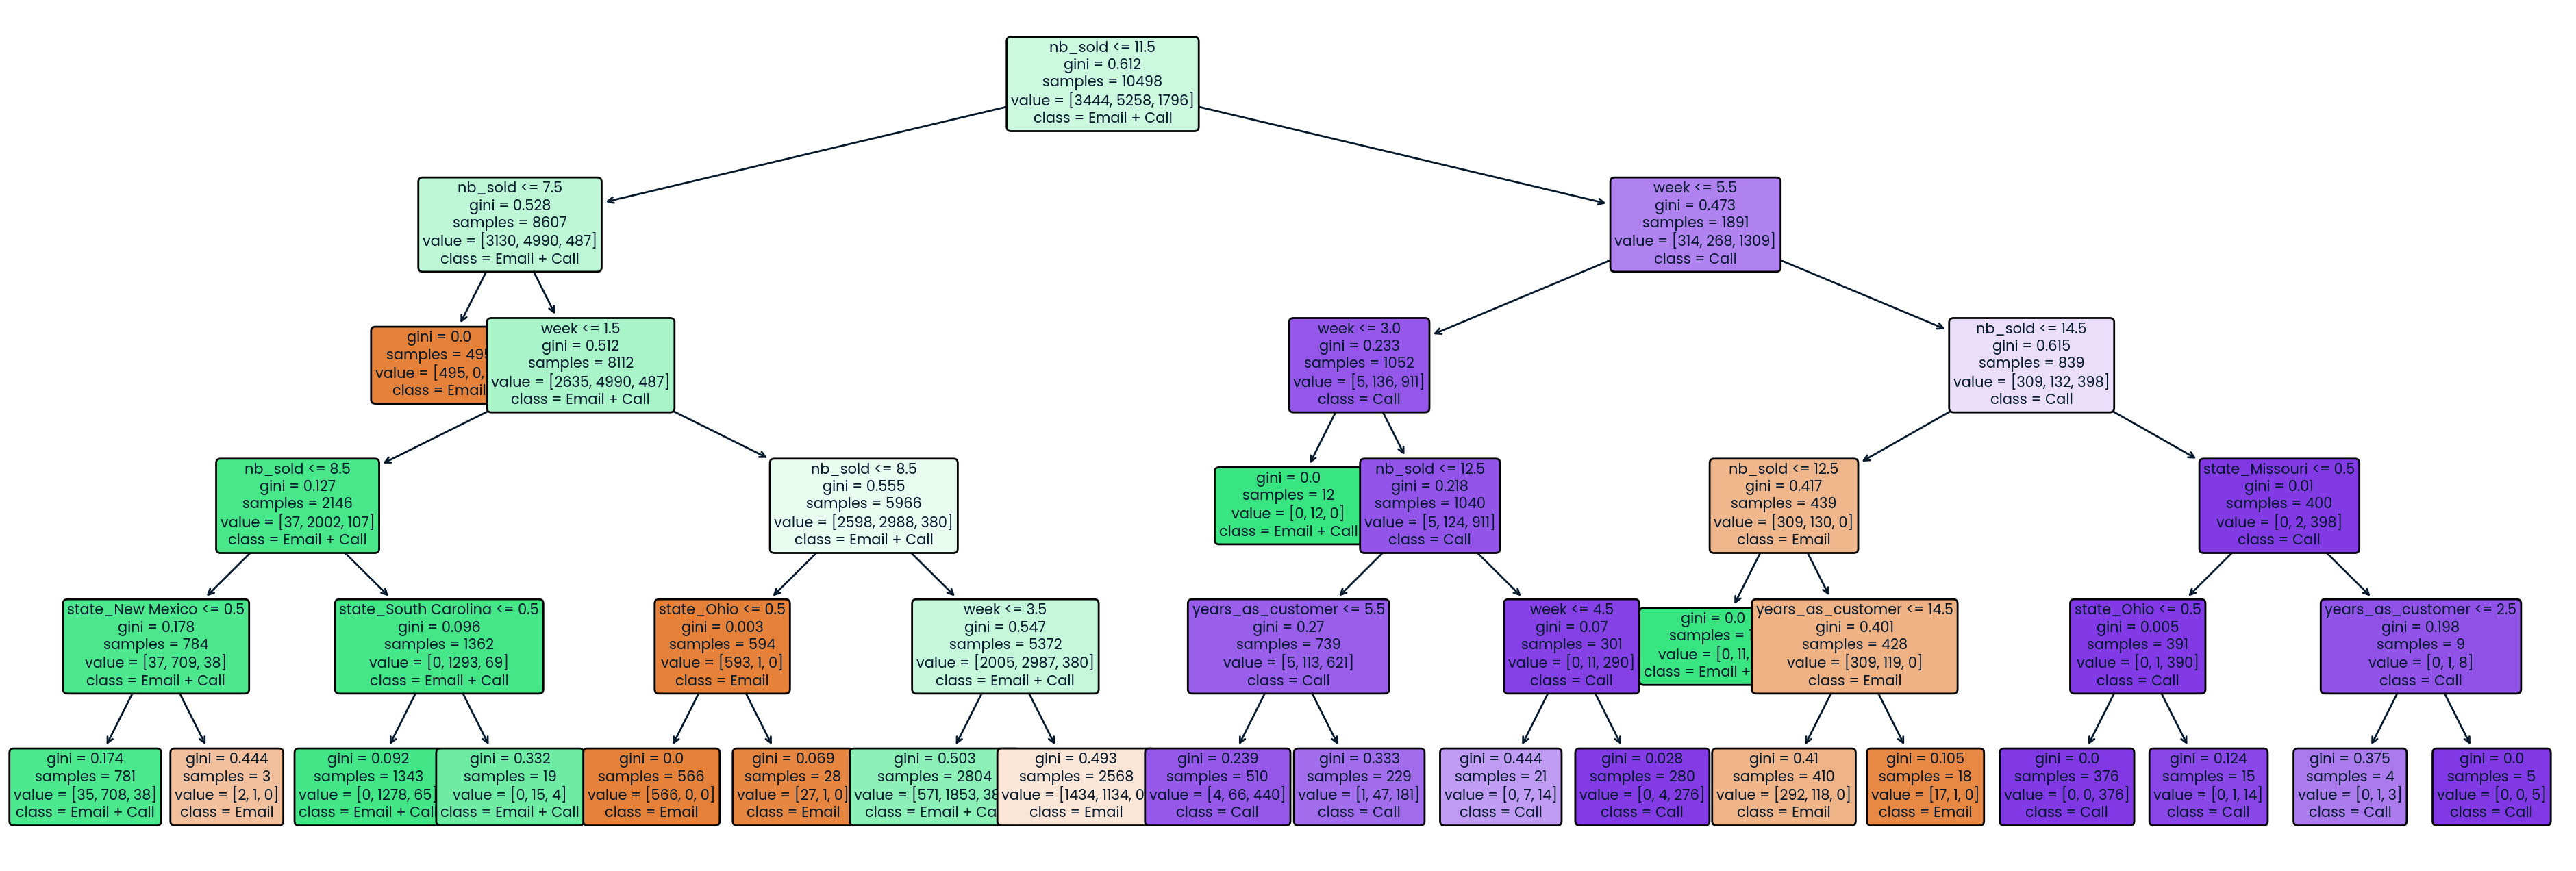

In [122]:
#decision tree visualization
plt.figure(figsize=(24,8))
plot_tree(model, 
          feature_names=list(X.columns.values), 
          class_names=list(y.values),
         filled=True,
         rounded=True,
         fontsize = 7.5)
plt.show()

<h3>Metric to Improve</h3>
<p>Calling alone is the worst sales strategy for revenue generation. This method also takes more time than either of the other two methods. To improve sales and reduce overhead, the business should abandon the Call method and begin to measure revenue as a function of sales representative time. The revenue/time ratio will allow the business to assess how effectively sales representative time is being used.</p>

<p>For the initial calculation of this metric, the following assumptions were made:
    <ul>
	    <li>All Call method sales took 30 minutes</li>
	    <li>All Email method sales took 2 minutes</li>
	    <li>All Email + Call method sales took 12 minutes</li>
    </ul>
</p>

<p>Calculation as follows
<ul>
    <li>(Email Revenue+Call Revenue+EmailCall Revenue)/(Call Sales*30+Email Sales*2+EmailCall Sales*12)</li>
    <li>(236,394.69+ 724,216.13+ 472,730.95)/(4,961 *30+  7,465*2+ 2,572*12)</li>
    <li>7.36</li>
</ul>
The current revenue/time ratio is 7.36. This ratio is expected to increase significantly if the Call method is abandoned and replaced with the Email and Email + Call methods.</p>

<h2>Summary and Recommendations</h2>
<p>The Call method significantly underperformed other methods in revenue generation while taking up the most sales representative time. This method should be abandoned and replaced with a targeted approach with the following steps:
    <ul>
	    <li>All customers are initially emailed</li>
	    <li>Customers expected (either by response or further behavioral modeling) to purchase more than 11 new products or spend more than $75 should receive a call 1 week later (per the email + call method)</li>
	    <li>Any customers that have not purchased by week 5 (the crossover point in email alone and email + call effectiveness) should receive a follow-up call</li>
    </ul>
The new revenue/time metric should be used to assess the effectiveness of this new sales strategy.</p>

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation